# Unimodal Model - CMU-MOSI Dataset

In this notebook, we implement the Unimodal Model, and test it on CMU-MOSI dataset.

## Importing Libraries

In [1]:
import os
import sys
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

## Importing Helper Functions

In [2]:
from helpers.data.get_data import get_dataloader
from helpers.unimodals.common_models import GRU, MLP, Sequential, Identity
from helpers.fusions.common_fusions import ConcatEarly
from helpers.training.unimodal import train, test
from helpers.utils.common_utils import get_default_device, save_results

## Loading the Dataset

In [3]:
traindata, validdata, testdata = get_dataloader(
    '/scratch/rrm9598/data/mosi_raw.pkl', robust_test=False, max_pad=True, data_type='mosi', max_seq_len=50)

In [4]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [5]:
modality_num = 2

encoder = GRU(300, 600, dropout=True, has_padding=False,
              batch_first=True, last_only=True).to(device)

head = MLP(600, 512, 1).to(device)

## Training

In [6]:
FILE_NAME = 'mosi_uni_r0'

In [7]:
train_losses, valid_losses = train(
    encoder, head, traindata, validdata, 200, 
    task="regression", optimtype=torch.optim.AdamW, lr=2e-3,
    weight_decay=0.01, criterion=torch.nn.L1Loss(), 
    save_encoder=f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}_encoder.pt', 
    save_head=f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}_head.pt', 
    modalnum=modality_num
)

Epoch [1/200]
Train Loss: 1.4123
Valid Loss: 1.3958
Saving Best

Epoch [2/200]
Train Loss: 1.3196
Valid Loss: 1.3836
Saving Best

Epoch [3/200]
Train Loss: 1.3201
Valid Loss: 1.3700
Saving Best

Epoch [4/200]
Train Loss: 1.3239
Valid Loss: 1.3875

Epoch [5/200]
Train Loss: 1.3216
Valid Loss: 1.3925

Epoch [6/200]
Train Loss: 1.3196
Valid Loss: 1.3869

Epoch [7/200]
Train Loss: 1.3204
Valid Loss: 1.3808

Epoch [8/200]
Train Loss: 1.3200
Valid Loss: 1.3881

Epoch [9/200]
Train Loss: 1.3214
Valid Loss: 1.3923

Epoch [10/200]
Train Loss: 1.3193
Valid Loss: 1.3844

Epoch [11/200]
Train Loss: 1.3192
Valid Loss: 1.3876

Epoch [12/200]
Train Loss: 1.3180
Valid Loss: 1.3768

Epoch [13/200]
Train Loss: 1.3220
Valid Loss: 1.3883

Epoch [14/200]
Train Loss: 1.3193
Valid Loss: 1.3861

Epoch [15/200]
Train Loss: 1.3181
Valid Loss: 1.3826

Epoch [16/200]
Train Loss: 1.3140
Valid Loss: 1.3824

Epoch [17/200]
Train Loss: 1.3227
Valid Loss: 1.4036

Epoch [18/200]
Train Loss: 1.3195
Valid Loss: 1.3878

E

Text(0.5, 1.0, 'Loss vs. No. of epochs')

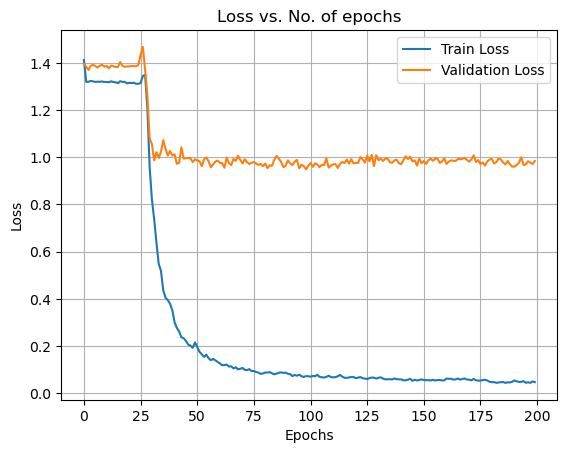

In [8]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [9]:
save_results(train_losses, valid_losses, f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/results/{FILE_NAME}.pkl')

## Testing

In [10]:
encoder = torch.load(f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}_encoder.pt').to(device)
head = torch.load(f'/scratch/rrm9598/Multimodal-Sentiment-Analysis/models/{FILE_NAME}_head.pt').to(device)

test(encoder, head, testdata, 'affect', criterion=torch.nn.L1Loss(),
     task="posneg-classification", modalnum=modality_num, no_robust=True)

Loss: 1.0258
Recall: 73.7805% | Total Accuracy: 73.4694%
Inference Time: 452ms
Inference Params: 1931825
